In [1]:
import sys
sys.path.insert(1, '../')
from heterogenous_game_theory import *
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
plt.style.use('fivethirtyeight')
seed = 16
np.random.seed(seed)

AGENT PARAMETERS IN POPULATION
-------------------------------------
   M 		  E 		  I
-------------------------------------
| 1000 		 0.24 		 0.15 |
| 1000 		 0.02 		 0.31 |
| 1000 		 0.34 		 0.31 |
| 1000 		 0.45 		 0.06 |
| 1000 		 0.14 		 0.19 |
| 1000 		 0.13 		 0.17 |
| 1000 		 0.02 		 0.01 |
| 1000 		 0.2 		 0.07 |
| 1000 		 0.22 		 0.24 |
| 1000 		 0.05 		 0.11 |
| 1000 		 0.25 		 0.22 |
| 1000 		 0.33 		 0.26 |
| 1000 		 0.43 		 0.24 |
| 1000 		 0.31 		 0.2 |
| 1000 		 0.29 		 0.19 |
| 1000 		 0.48 		 0.17 |
| 1000 		 0.36 		 0.18 |
| 1000 		 0.23 		 0.1 |
| 1000 		 0.21 		 0.12 |
-------------------------------------
The s.d. of M is: 0.0
The s.d. of E is: 0.13
The s.d. of I is: 0.14
-------------------------------------
The mean of M is: 1000
The mean of E is: 0.2
The mean of I is: 0.21
-------------------------------------


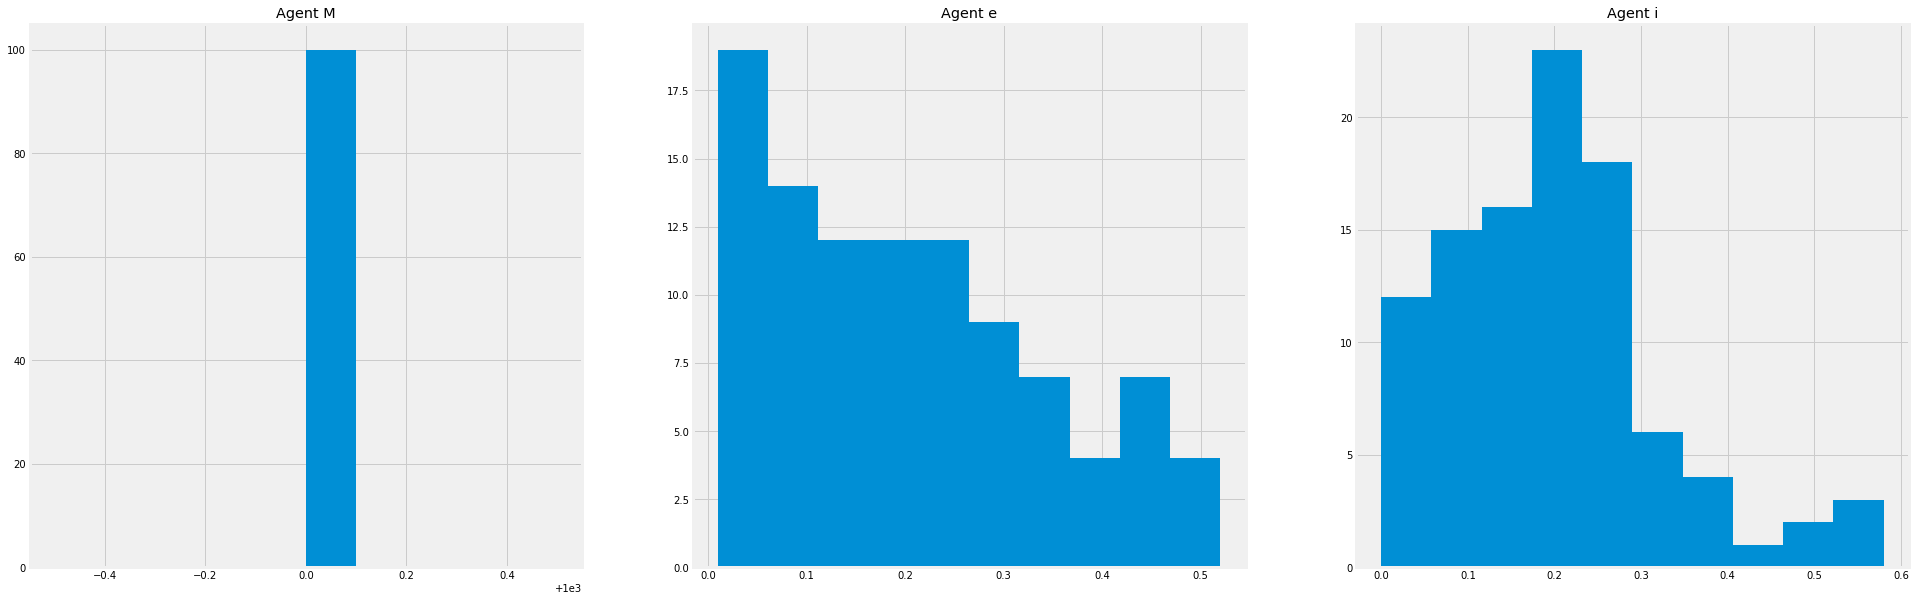

____________________________________________________________________________________________________
Agent 0 playing Agent 1: Reward: 237.0, Temptation: 240.0, Sucker: -3.0, Punishment: 0
Agent 1 playing Agent 0: Reward: -54.0, Temptation: 20.0, Sucker: -74.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 2: Reward: 189.0, Temptation: 240.0, Sucker: -51.0, Punishment: 0
Agent 2 playing Agent 0: Reward: 266.0, Temptation: 340.0, Sucker: -74.0, Punishment: 0
____________________________________________________________________________________________________
____________________________________________________________________________________________________
Agent 0 playing Agent 3: Reward: 172.0, Temptation: 240.0, Sucker: -68.0, Punishment: 0
Agent 3 playing Agent 0: Reward: 436.0, Temptation: 450.0

In [2]:
# if we want to run simulations with heterogenous populations - we need to set homogeneous to false, 
# and we have the option to set a value for M, E, and I for heterogenous populations (defaults are 1000, 0.1, 0.1 for homogenous)

# first number is median, second standard deviation
M = [1000, 1/10000]
E = [0.1, 0.2]
I = [0.1, 0.2]

# create a list of agents, default = 100
agents = get_agents(homogenous = False, number_of_agents = 100, M = M, E = E, I = I)
check_parameters(agents)
compare_payoff_function(agents, default_payoff_functions)

Tournament has started...
Tournament has ended. The simulation took 43 minutes.
    S.D.  Counts Seed
0    0.5     181   16
1    0.6     185   16
2    0.7     183   16
3    0.8     190   16
4    0.9     186   16
5    1.0     187   16
6    1.1     160   16
7    1.2     138   16
8    1.3     121   16
9    1.4     101   16
10   1.5      82   16
11   1.6      65   16
12   1.7      62   16
13   1.8      47   16
14   1.9      27   16
15   2.0      21   16
16   2.1      17   16
17   2.2      12   16
18   2.3       9   16
19   2.4       4   16
20   2.5       3   16
21   2.6       1   16
22   2.7       0   16
23   2.8       0   16
24   2.9       0   16
25   3.0       0   16


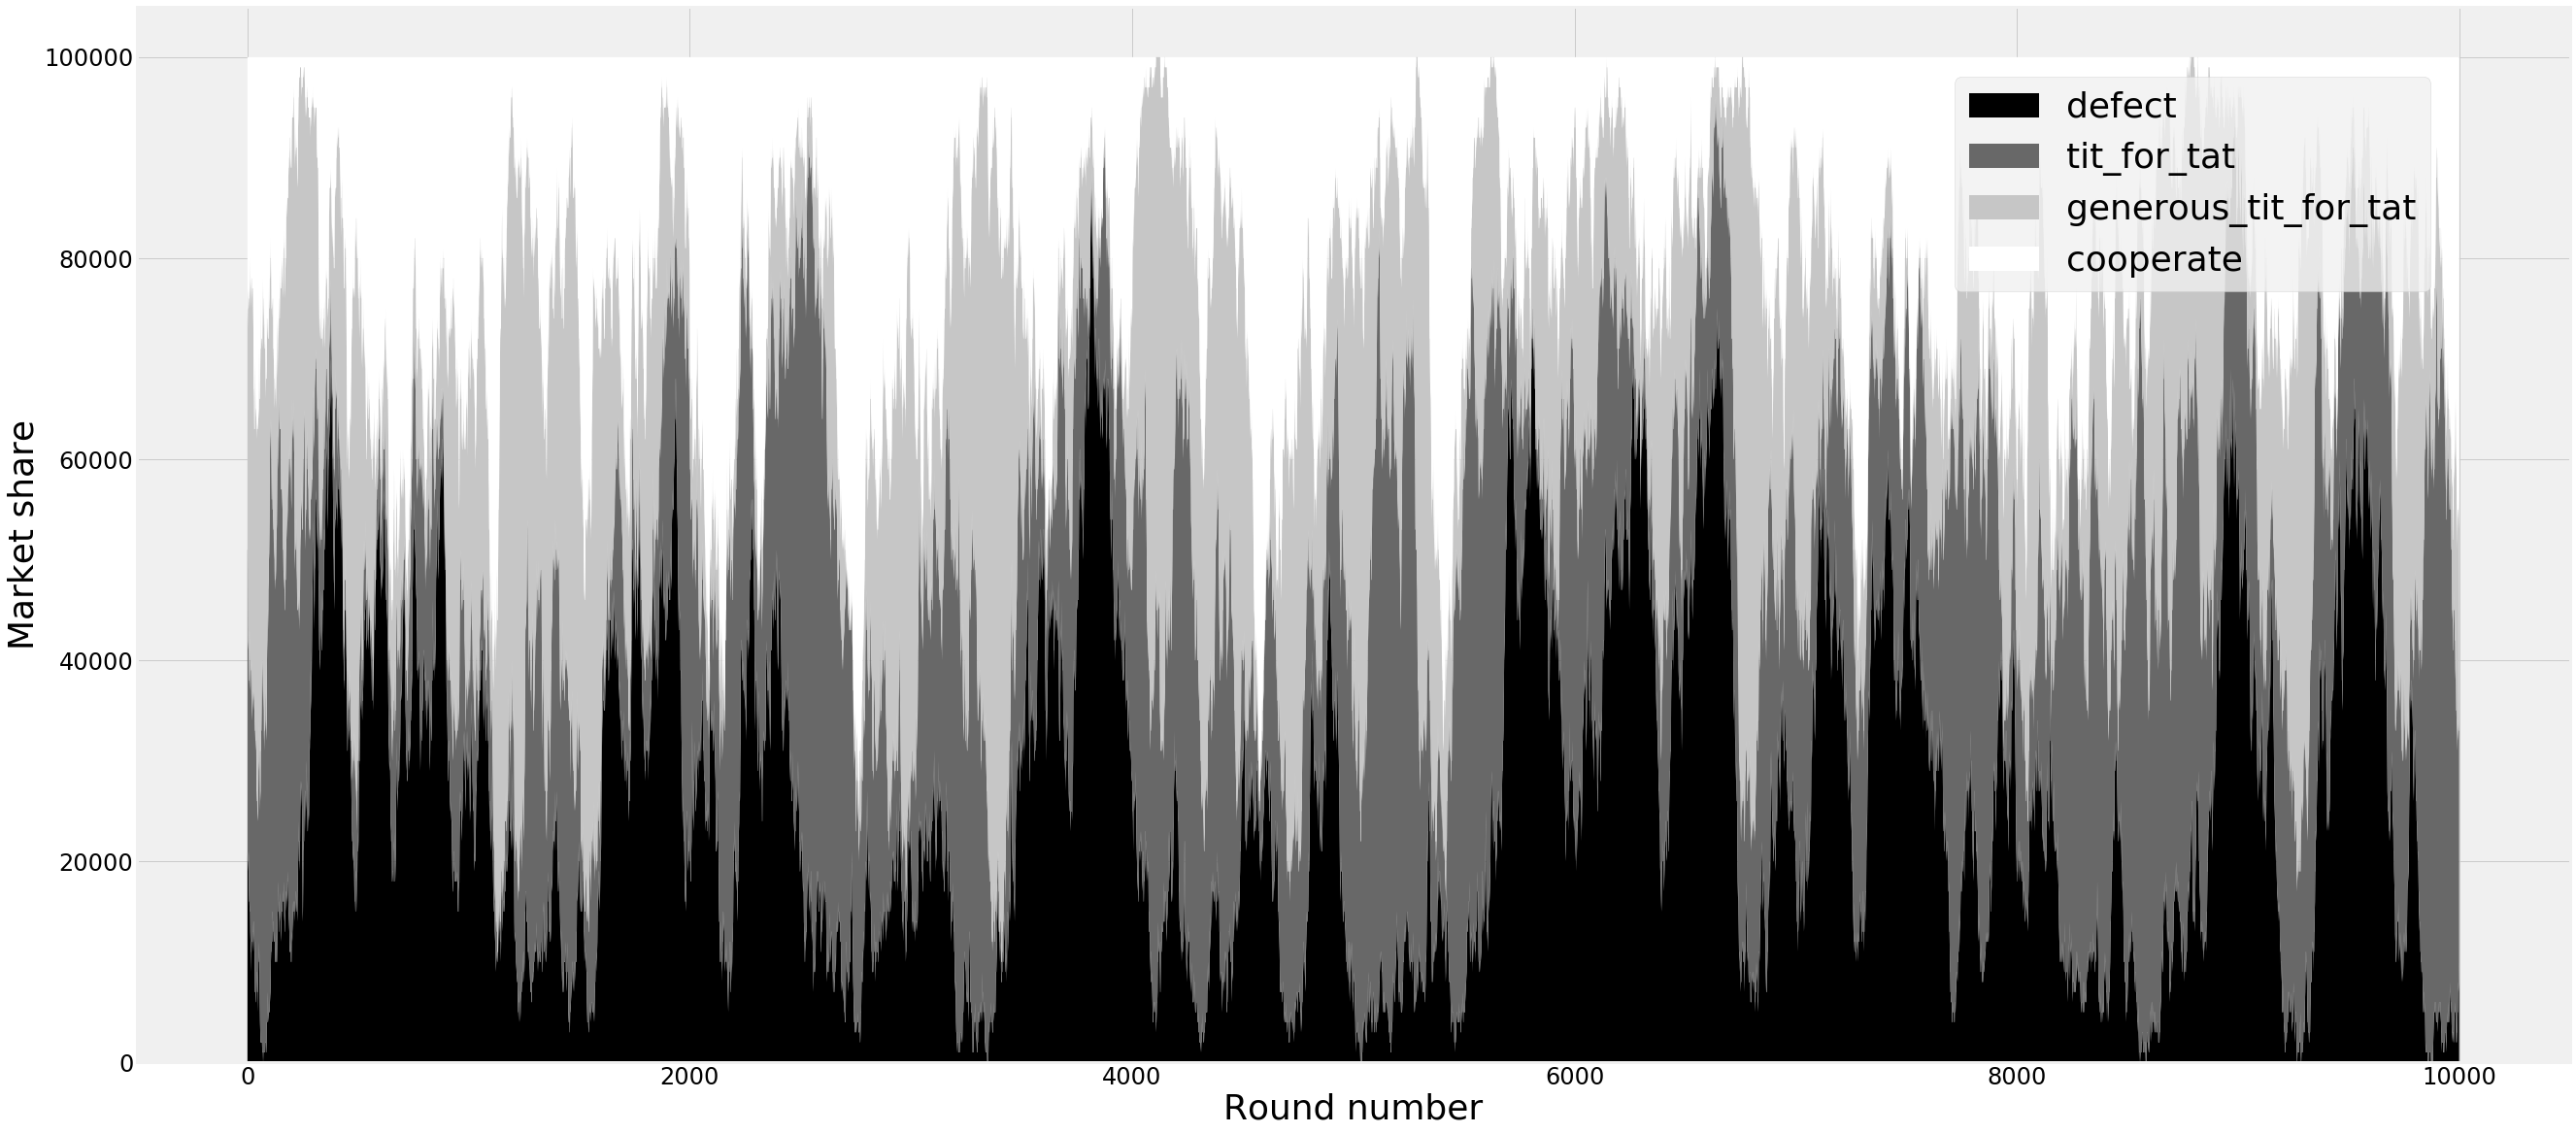

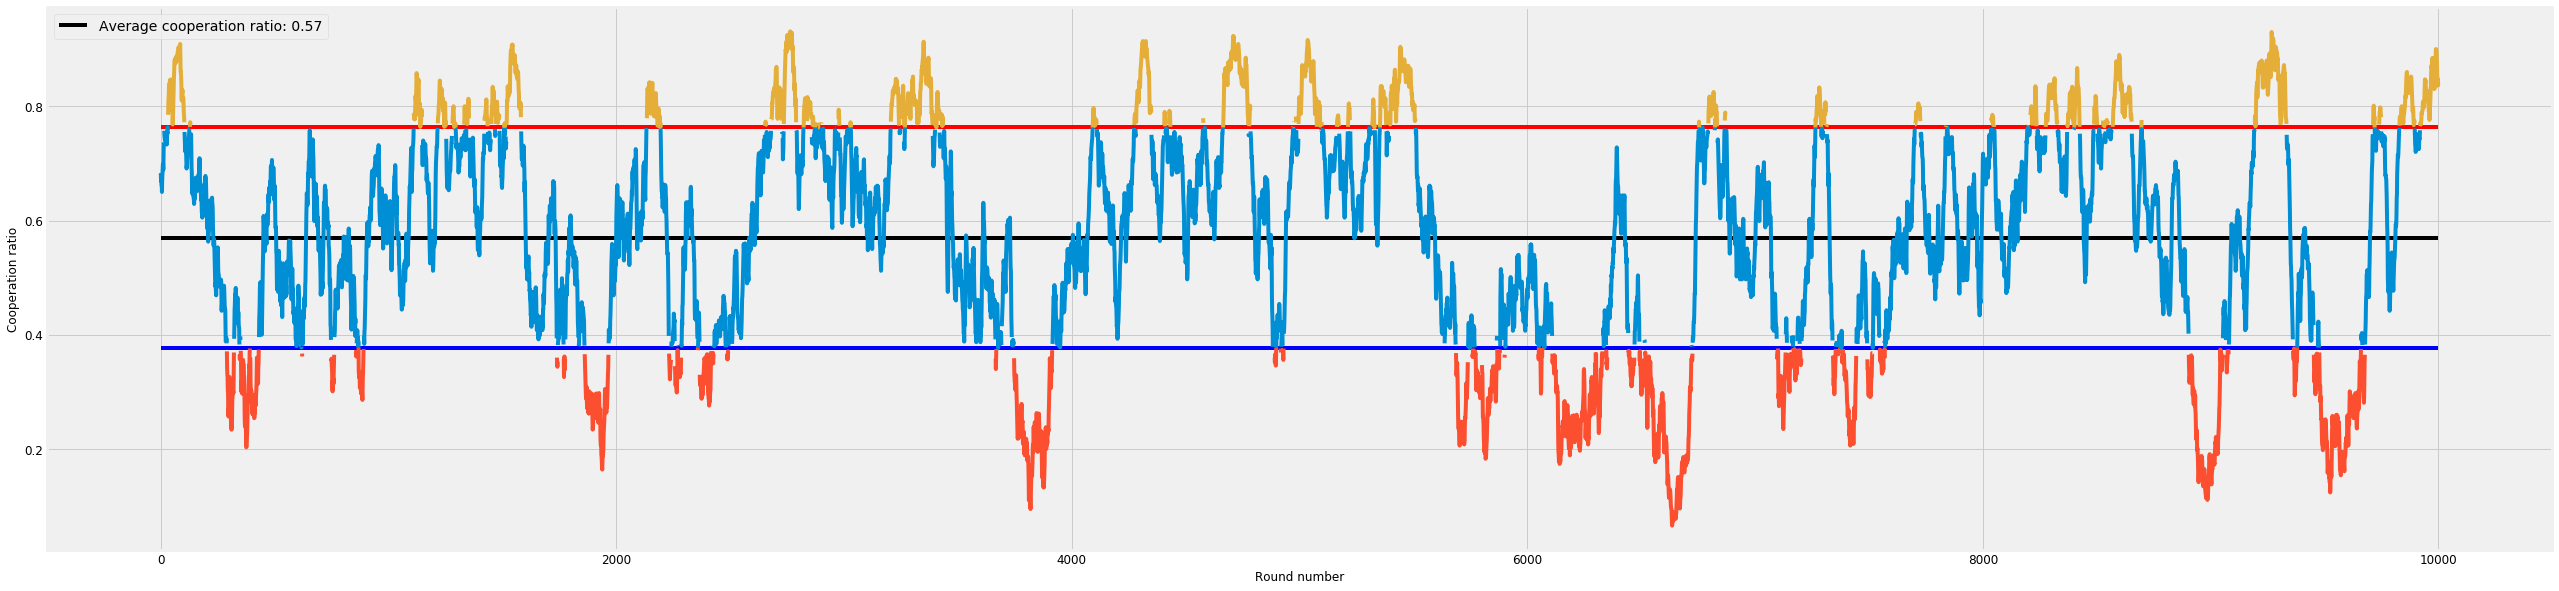

In [3]:
tour = Tournament.create_play_tournament(
                 agents = agents, 
                 max_rounds = 10000, 
                 strategy_list = [defect, tit_for_tat, generous_tit_for_tat, cooperate], 
                 payoff_functions = default_payoff_functions, 
                 surveillance_penalty = True,
                 self_reward = selfreward, #default function
                 playing_each_other = True,
                 nr_strategy_changes = 10,
                 mutation_rate = 0.1,
                 init_fitnes_as_m = False,
                 noise = 0.05,
                 )
draw_stack(tour)
C_D_ratios_per_round_var(tour, constant = 1)
outliers = count_outliers(tour, constants = np.arange(0.5, 3.1, 0.1))
data = {'S.D.': list(outliers.keys()), 'Counts': list(outliers.values()), 'Seed': str(seed)}
df = pd.DataFrame.from_dict(data)
print(df)
df.to_csv("Data/data_" + str(seed) + "_outliercounts.csv", encoding='utf-8', index = False, float_format='%.1f')
save_tournament_csv(tour, type_of_tournament= "_changing_sdei", seed = str(seed))